In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots
using GLM
using Statistics
using Distributions
using Random
using MultivariateStats
using LIBSVM

## This notebook has strong inspiration from [ISLR-python](https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%209.ipynb)

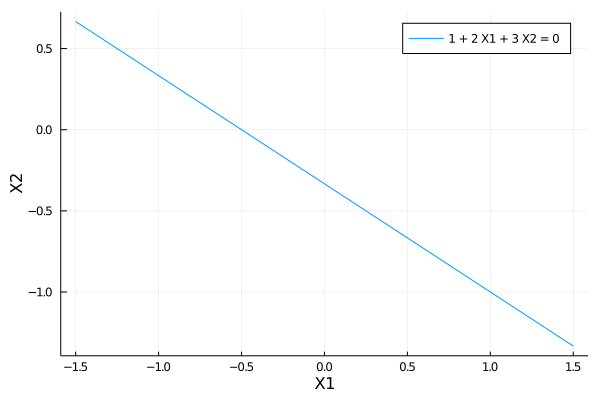

In [2]:
# Figure 9.1
X1 = [-1.5, 1.5]
X2 = [2.0/3.0, -4.0/3.0]
plot(X1, X2, xlabel="X1", ylabel="X2", label="1 + 2 X1 + 3 X2 = 0")

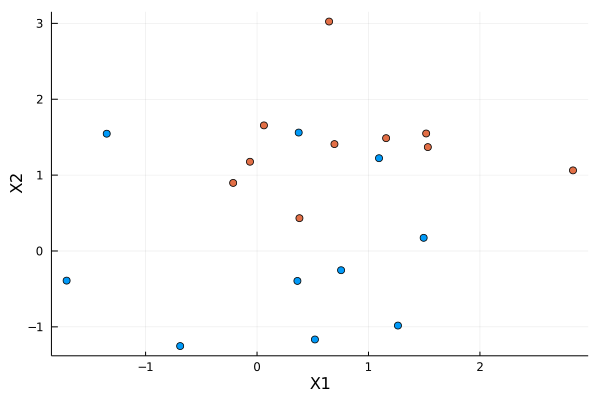

In [3]:
x = randn(20, 2)
labels = repeat([-1, 1], 10)
x[labels .== -1, :] = x[labels .== -1, :] .+ 1

scatter(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2", legend=false)

In [4]:
function plot_svc(model, x, y, h=0.02, pad=0.25)
    x_min = minimum(x[:, 1]) - pad
    x_max = maximum(x[:, 1]) + pad
    y_min = minimum(x[:, 2]) - pad
    y_max = maximum(x[:, 2]) + pad
    
    xx = x_min:h:x_max
    yy = y_min:h:y_max
    
    f(i, j) = begin 
        c = reshape([i; j], (2, 1))
        pred = svmpredict(model, c) 
#         if pred[2][1] < 0
#             return -1
#         end
#         return 1
        return pred[2][1]
    end
    
#     contour(xx, yy, f, fill = true)
    contour(xx, yy, f, fill = true, colorbar_entry=false, levels=1)
    # use colorbar_entry = false to hide the side color bar
    # levels = 1 means there are only 2 colors for contour plot
    # see more options in src/arg_desc.jl of https://github.com/JuliaPlots/Plots.jl/
end

plot_svc (generic function with 3 methods)

In [5]:
model = svmtrain(x', labels,  kernel=Kernel.Linear);

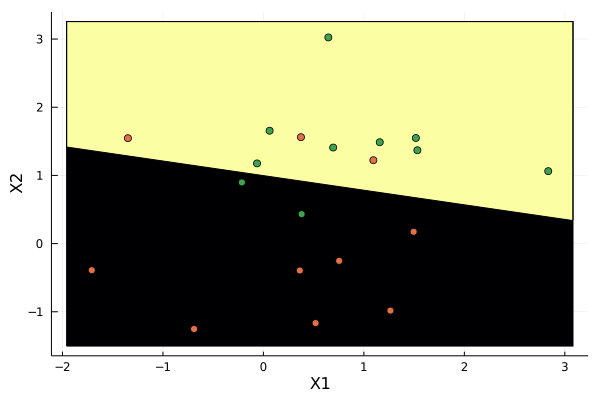

In [6]:
plot_svc(model, x, labels)
scatter!(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2", legend=false)

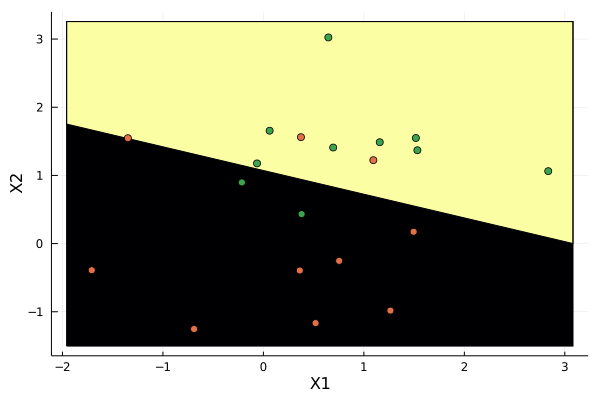

In [7]:
model = svmtrain(x', labels,  kernel=Kernel.Linear, cost=0.1)

plot_svc(model, x, labels)
scatter!(x[labels .== 1, 1], x[labels .== 1, 2])
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2", legend=false)

In [8]:
x = randn(20, 2);
labels = repeat([-1, 1], 10);
x[labels .== -1, :] = x[labels .== -1, :] .+ 5;

In [9]:
model = svmtrain(x', labels,  kernel=Kernel.Linear);

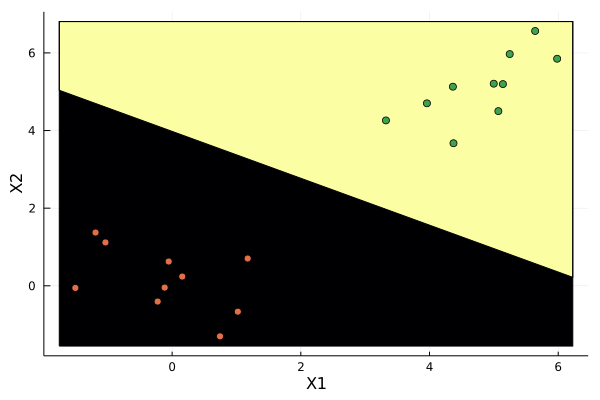

In [10]:
plot_svc(model, x, labels);
scatter!(x[labels .== 1, 1], x[labels .== 1, 2]);
scatter!(x[labels .== -1, 1], x[labels .== -1, 2], xlabel="X1", ylabel="X2", legend=false)

## SVM with non-linear kernel

In [11]:
X = randn(2, 200);
X[:, 1:100] = X[:, 1:100] .+ 2;
X[:, 101:150] = X[:, 101:150] .- 2;

labels = vcat(repeat([-1], 150), repeat([1], 50));

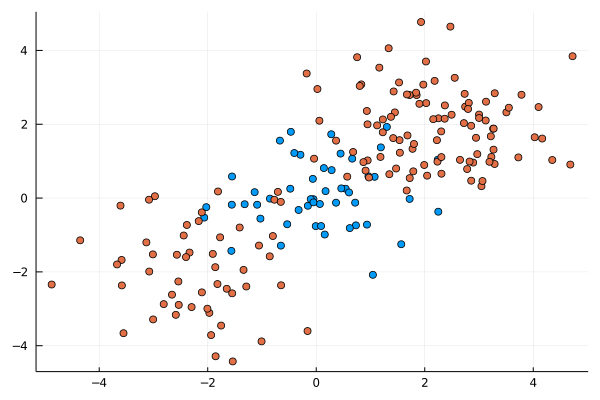

In [12]:
scatter(X[1, labels .== 1], X[2, labels .== 1])
scatter!(X[1, labels .== -1], X[2, labels .== -1], legend=false)

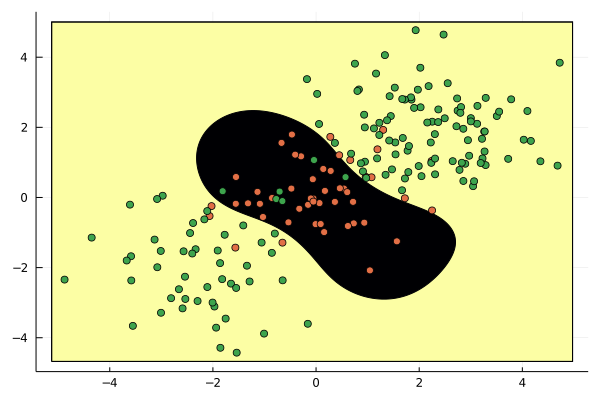

In [13]:
model = svmtrain(X, labels) # default kernel is RadialBasis

plot_svc(model, X', labels)
scatter!(X[1, labels .== 1], X[2, labels .== 1])
scatter!(X[1, labels .== -1], X[2, labels .== -1], legend=false)

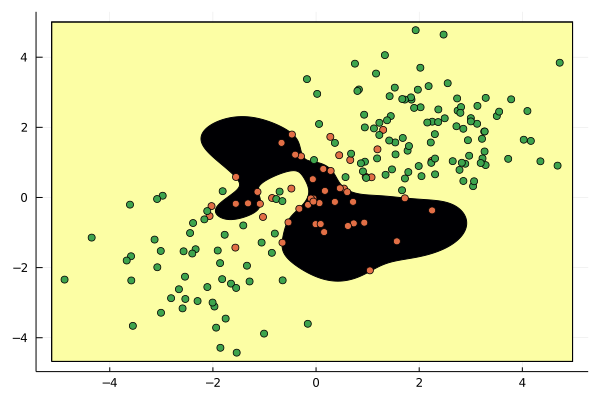

In [14]:
model = svmtrain(X, labels, cost=100.0, gamma=1.0) # default kernel is RadialBasis

plot_svc(model, X', labels)
scatter!(X[1, labels .== 1], X[2, labels .== 1])
scatter!(X[1, labels .== -1], X[2, labels .== -1], legend=false)